Descrição: O dataset escolhido foi o de diagnosticar pacientes que apresentam câncer de mama, neste dataset cada instância representa detalhes médicos dos pacientes, os preditores são dados e parâmetros antropométricos que podem ser coletados na análise de sangue de rotina, existem 10 preditores, todos quantitativos, e uma variável binária, indicando a presença ou ausência de câncer de mama (1 para “controles saudáveis ” e 2 para “pacientes”).

Para cada um dos 166 participantes, várias características clínicas foram observadas ou medidas, incluindo idade, IMC, Glicose, Insulina, HOMA, Leptina, Adiponectina, Resistina e MCP-1.

### 1º Algoritmo : Classificador Naive Bayes

In [1]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from numpy.random import seed
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
datset_cm = pd.read_csv('dataR2.csv',delimiter=",")

In [53]:
datset_cm.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


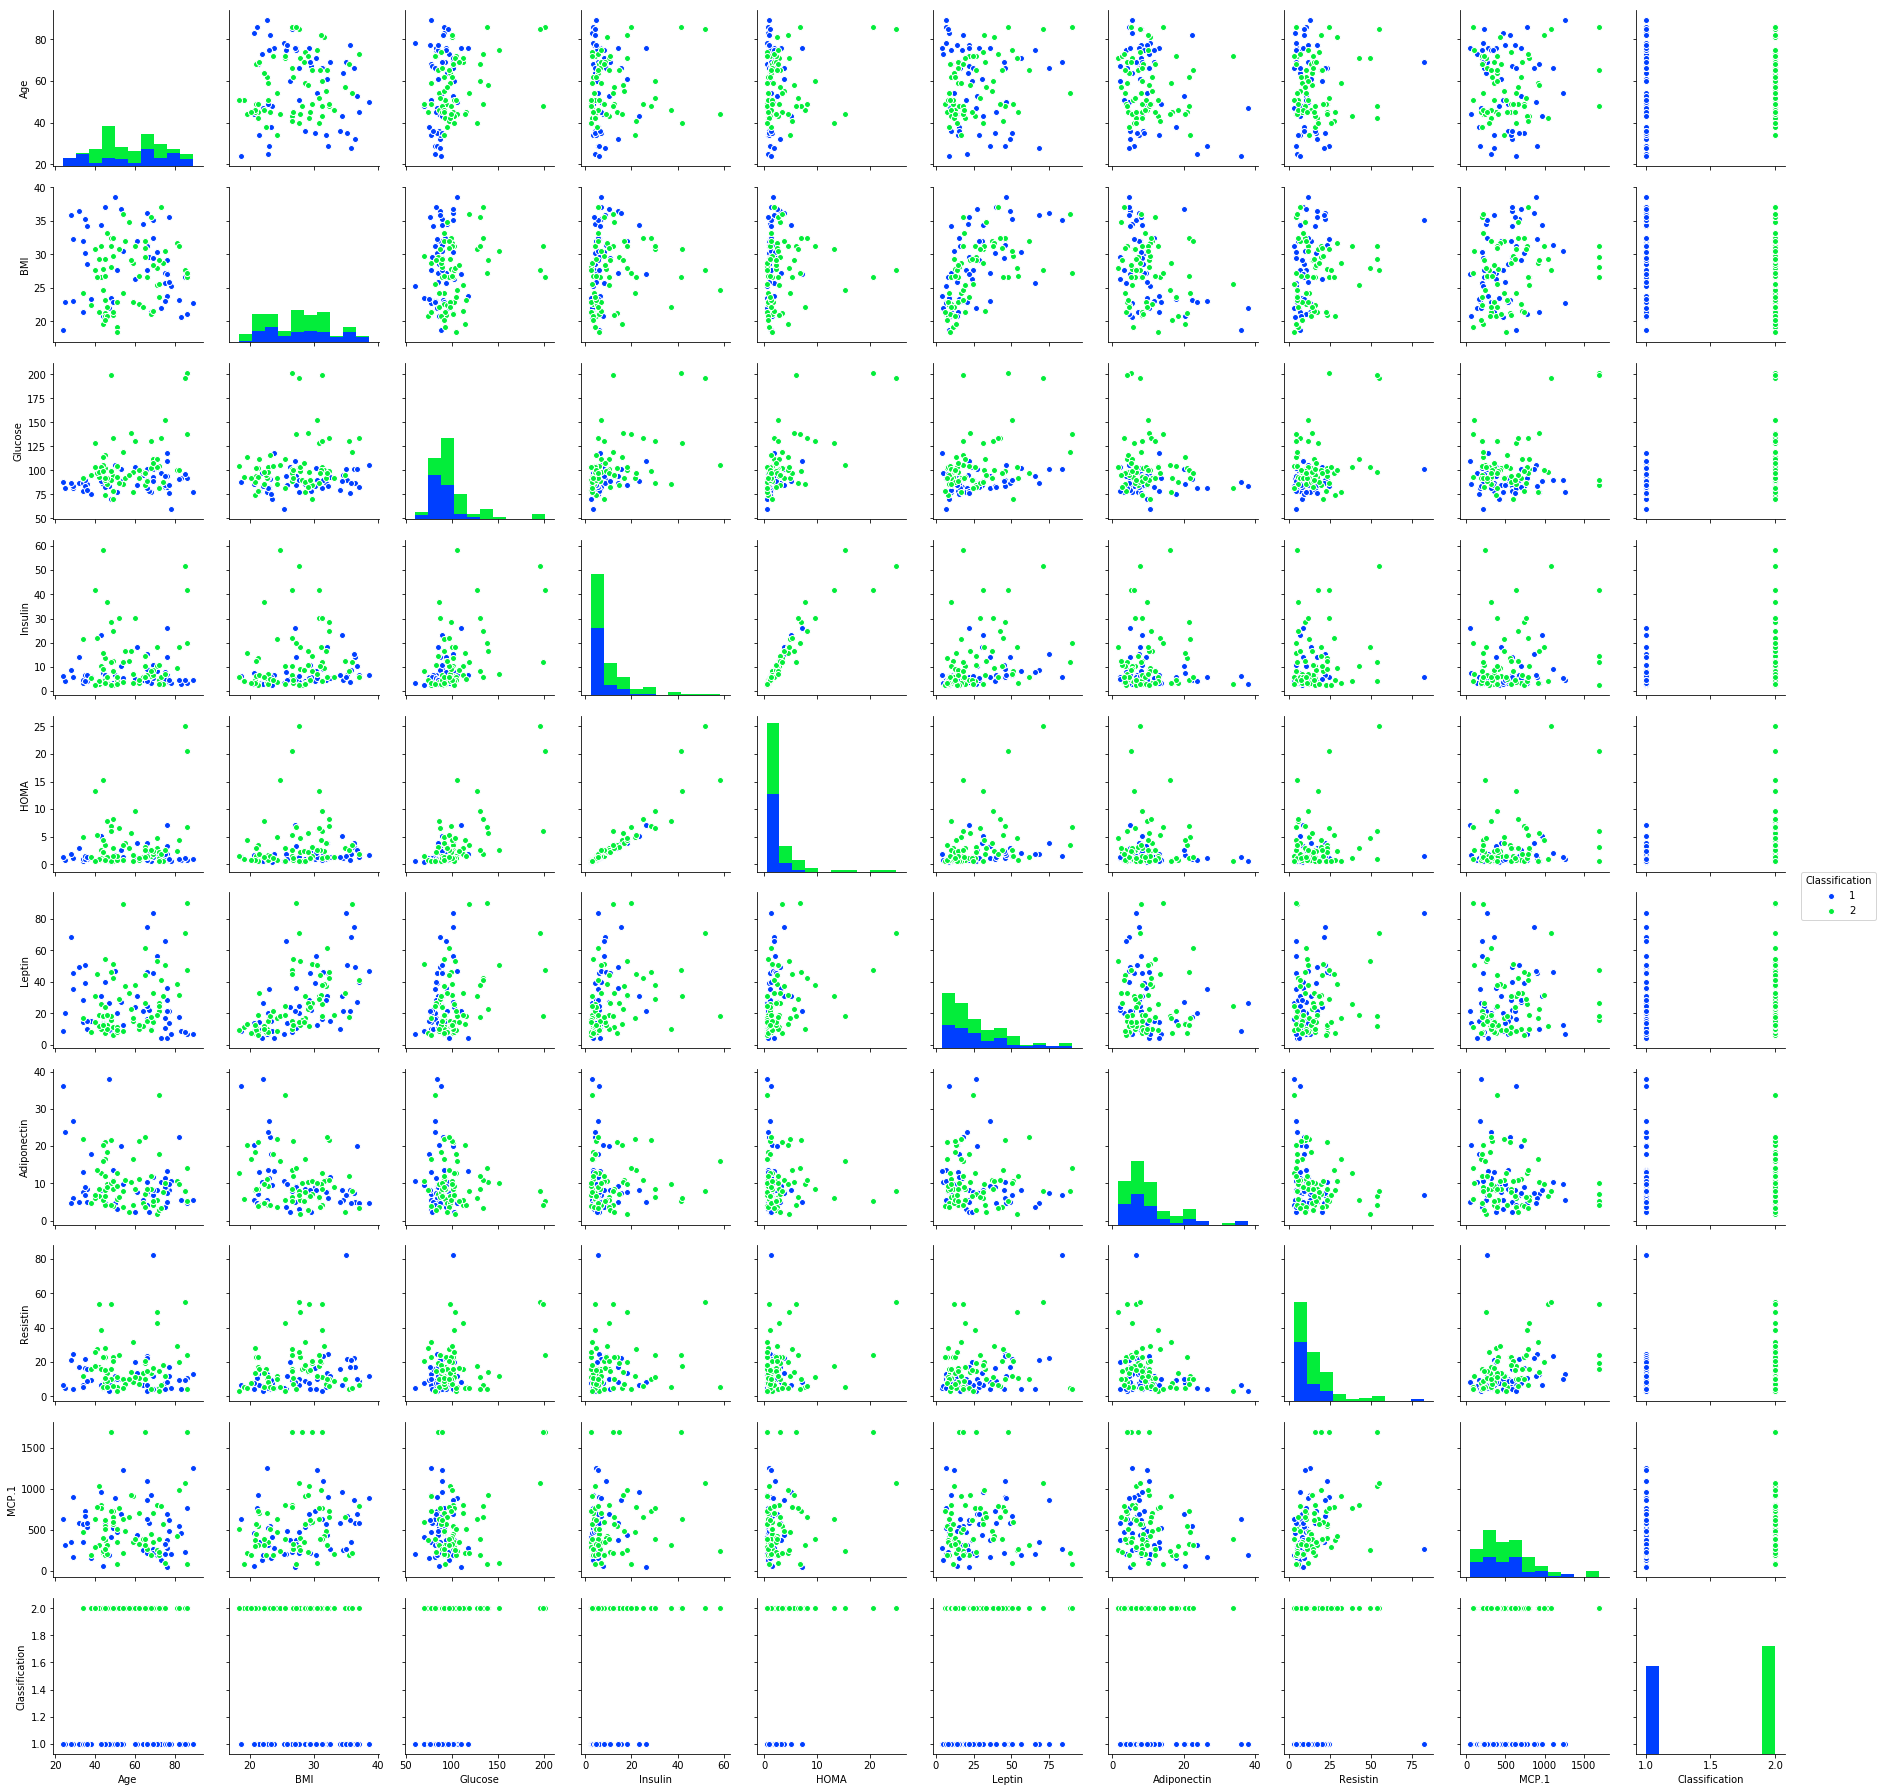

In [4]:
sb.set_palette("bright")
sb.pairplot(datset_cm[['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']],hue='Classification')

In [5]:
datset_cm.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


#### Treinamento

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(datset_cm.drop("Classification",1), datset_cm.Classification, test_size=0.30,random_state=seed())

In [7]:
clf2 = GaussianNB()
clf2.fit(X_train2, y_train2)

GaussianNB(priors=None)

### Modelo aprendido

O modelo aprendido é amarzenado nas propriedades theta e sigma

In [8]:
zip(datset_cm.columns,clf2.theta_[0])

[('Age', 61.583333333333336),
 ('BMI', 28.74265189333333),
 ('Glucose', 89.25),
 ('Insulin', 7.4880555555555555),
 ('HOMA', 1.7006292629166668),
 ('Leptin', 29.818977777777782),
 ('Adiponectin', 9.237362083333332),
 ('Resistin', 12.435892222222224),
 ('MCP.1', 508.2491388888889)]

In [9]:
zip(datset_cm.columns,clf2.theta_[1])

[('Age', 56.46666666666667),
 ('BMI', 27.09618397066666),
 ('Glucose', 103.17777777777778),
 ('Insulin', 10.324466666666668),
 ('HOMA', 2.9736187408444437),
 ('Leptin', 27.46291333333333),
 ('Adiponectin', 10.42643988888889),
 ('Resistin', 16.18070888888889),
 ('MCP.1', 530.9888666666667)]

In [10]:
clf2.sigma_

array([[3.41520933e+02, 2.88664870e+01, 9.87987105e+01, 2.71016297e+01,
        1.77713920e+00, 4.33011437e+02, 3.15570230e+01, 1.71956443e+02,
        1.00682336e+05],
       [1.67048988e+02, 2.17775259e+01, 4.52635161e+02, 9.28544094e+01,
        1.58873322e+01, 4.24761332e+02, 4.20797039e+01, 1.54053801e+02,
        9.81145445e+04]])

In [11]:
campos = ['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1','Classification']

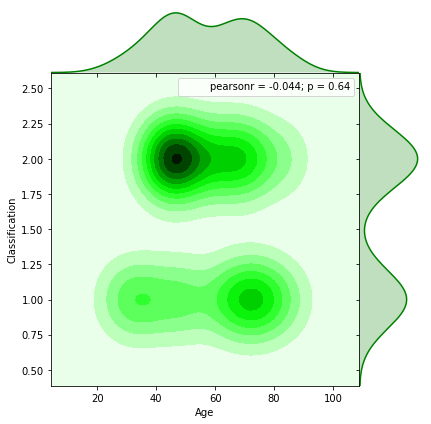

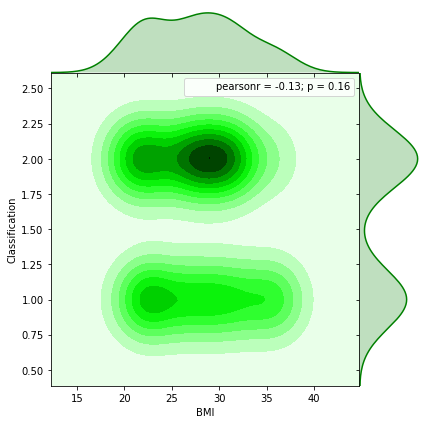

In [12]:
sb.jointplot("Age", "Classification", data=datset_cm,kind="kde", space=0, color="g")
sb.jointplot("BMI", "Classification", data=datset_cm,kind="kde", space=0, color="g")

Text(0.5,0,u'Glucose')

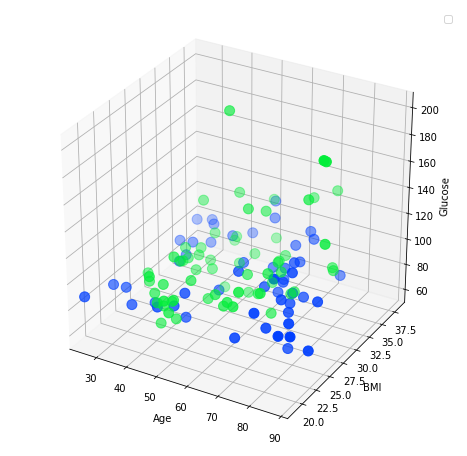

In [49]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

groups = datset_cm.groupby('Classification')

x=datset_cm.columns[0]
y=datset_cm.columns[1]
z=datset_cm.columns[2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')
ax.margins(0.025) 
for name, group in groups:
    ax.scatter(group[x],group[y],group[z],marker='o',s=100)
ax.legend()
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)


### Avaliação do modelo

In [14]:
y_pred2 = clf2.predict(X_test2)

In [15]:
print(confusion_matrix(y_test2, y_pred2))  
print(classification_report(y_test2, y_pred2))

[[12  4]
 [ 9 10]]
             precision    recall  f1-score   support

          1       0.57      0.75      0.65        16
          2       0.71      0.53      0.61        19

avg / total       0.65      0.63      0.63        35



Para o NaiveBayes os resultados obtidos nas para pacientes saudaves foram: 57% na métrica de precisão, 75% na métrica de recall e 65% na métrica de f1-score. Para os pacientes que possuem a doença os resultados foram os seguintes: 71% na métrica de precisão, 53% na métrica de recall e 61% na métrica de f1-score. 

Os resultados obtidos na matriz de confusão para o algoritmo NaiveBayes que a cada 16 dados analisados 12 foram analisados corretamente como "controle saudaveis", e 4 classificados incorretamente como "paciente" (com a doença), de 19 dados analisados, 9 foram classificados incorretamente como "controle saudaveis", e 10 classificados corretamente como "paciente" (com a doença).
Totalizando 22 instância analisadas corretamente e 13 instâncias analisadas incorretamente. Para essa análise foram utilizados todos os atributos do dataset. 


Etiquetas: 
1 = controles saudáveis 
2 = pacientes

Em relação à percentagem de recal e f1-score, apresentam-se mais elevadas no algoritmo Naive Bayes e mais baixas no algoritmo de Arvore de decisão.

In [16]:
import matplotlib.pyplot as plt

Mean score 0.553 (0.103)


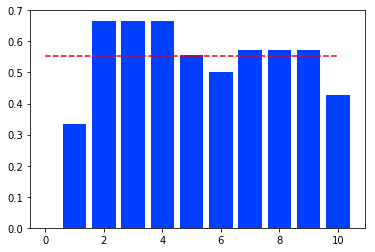

In [17]:
cv_score2 = cross_val_score(clf2, X_train2, y_train2, cv=10)
print ("Mean score %.3f (%.3f)" % (cv_score2.mean(), cv_score2.std()))
plt.bar(np.arange(1,11),cv_score2)
plt.plot([0,10],[cv_score2.mean(),cv_score2.mean()],'r--')

In [18]:
groupsDiab = datset_cm.groupby('Classification')

In [19]:
datset_cm.columns

Index([u'Age', u'BMI', u'Glucose', u'Insulin', u'HOMA', u'Leptin',
       u'Adiponectin', u'Resistin', u'MCP.1', u'Classification'],
      dtype='object')

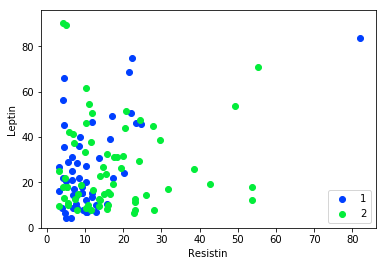

In [20]:
x=datset_cm.columns[7]
y=datset_cm.columns[5]
fig, ax = plt.subplots()
ax.margins(0.05) 
for name, group in groupsDiab:
    plt.scatter(group[x],group[y], marker='o', label=name)
ax.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.show()

## 2º Algoritmo : Arvores de Decisão

In [21]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix  
from numpy.random import seed
import graphviz
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

In [22]:
%matplotlib inline

In [23]:
datset_cm = pd.read_csv('dataR2.csv',delimiter=",")

### Treinamento

Particionamos o dataset em duas partes, com 70% para treinamento e 30% para teste

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(datset_cm.drop("Classification",1), datset_cm.Classification, test_size=0.30,random_state=seed())

In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Avaliação

In [26]:
y_pred = clf.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[11  8]
 [ 2 14]]
             precision    recall  f1-score   support

          1       0.85      0.58      0.69        19
          2       0.64      0.88      0.74        16

avg / total       0.75      0.71      0.71        35



Para o algoritmo de arvore de decisão os resultados obtidos nas para pacientes saudaves foram: 85% na métrica de precisão, 58% na métrica de recall e 69% na métrica de f1-score. Para os pacientes que possuem a doença os resultados foram os seguintes: 64% na métrica de precisão, 88% na métrica de recall e 74% na métrica de f1-score.

Os resultados obtidos na matriz de confusão para o algoritmo de arvore de decisão que a cada 19 dados analisados 11 foram analisados corretamente como "controle saudaveis", e 8 classificados incorretamente como "paciente" (com a doença), de 16 dados analisados, 2 foram classificados incorretamente como "controle saudaveis", e 14 classificados corretamente como "paciente" (com a doença). Totalizando 25 instância analisadas corretamente e 10 instâncias analisadas incorretamente. Para essa análise foram utilizados todos os atributos do dataset.

### Utilização do Modelo

Uma vez treinado, seu classificador pode ser utilizado.

In [28]:
x=np.array([45,21.30394858,102,13.852,3.4851632,7.6476,21.056625,23.03408,552.444])
print "Exemplo x = "+(str(x))
print ("Predicted Classification %d" %clf.predict(x.reshape(1,-1)))

Exemplo x = [ 45.          21.30394858 102.          13.852        3.4851632
   7.6476      21.056625    23.03408    552.444     ]
Predicted Classification 2


### Visualização do Modelo

Podemos utilizar o GraphViz para exportar o modelo da árvore.

In [29]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/rayma/Anaconda2/Library/bin/graphviz'

Arvore de decisão representa um conjunto de decisões da raíz até uma folha. Folhas indicam classes. Cada nodo da arvores representa um ponto de partição no domínio de de um atributo.

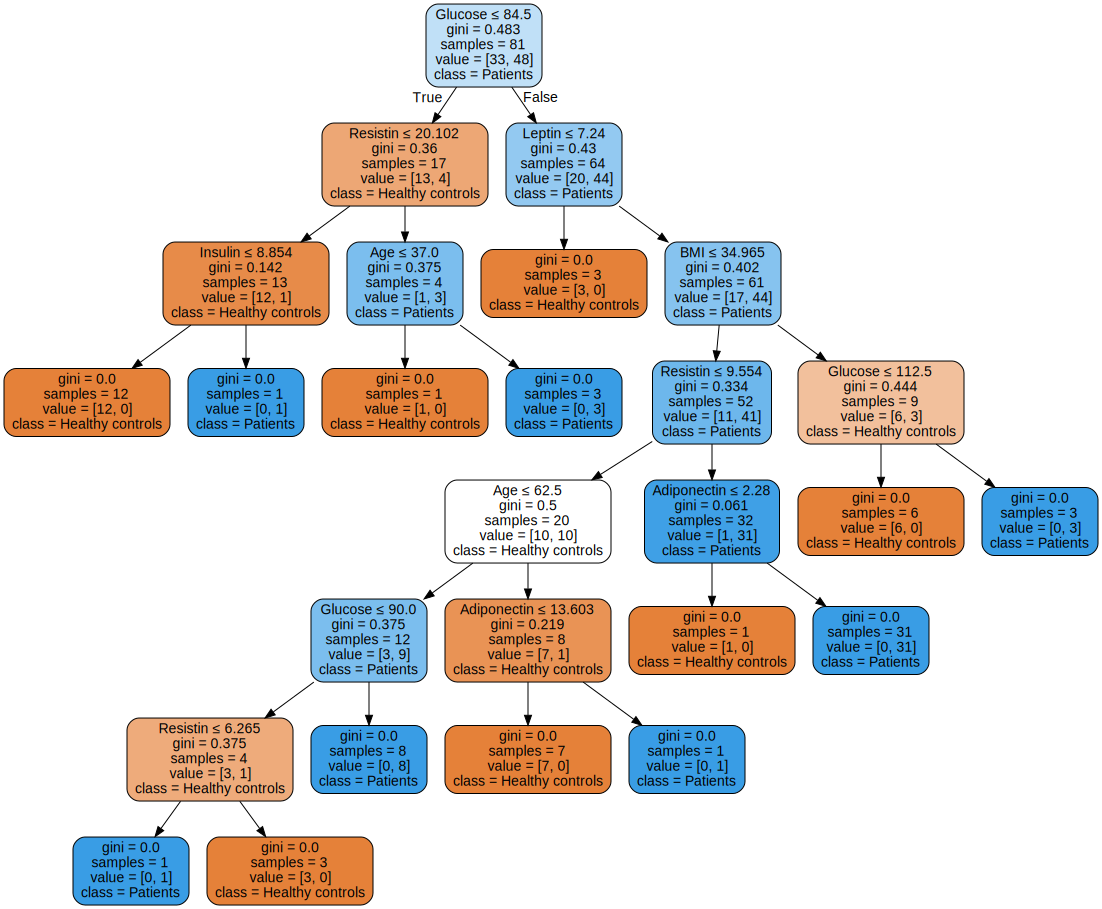

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1'], class_names=['Healthy controls','Patients'],  
                         filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

### Explorando Parâmetros

In [31]:
clf2 =  tree.DecisionTreeClassifier(criterion='entropy')
clf2 = clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)  
print(confusion_matrix(y_test, y_pred2))  
print(classification_report(y_test, y_pred2))

[[10  9]
 [ 3 13]]
             precision    recall  f1-score   support

          1       0.77      0.53      0.62        19
          2       0.59      0.81      0.68        16

avg / total       0.69      0.66      0.65        35



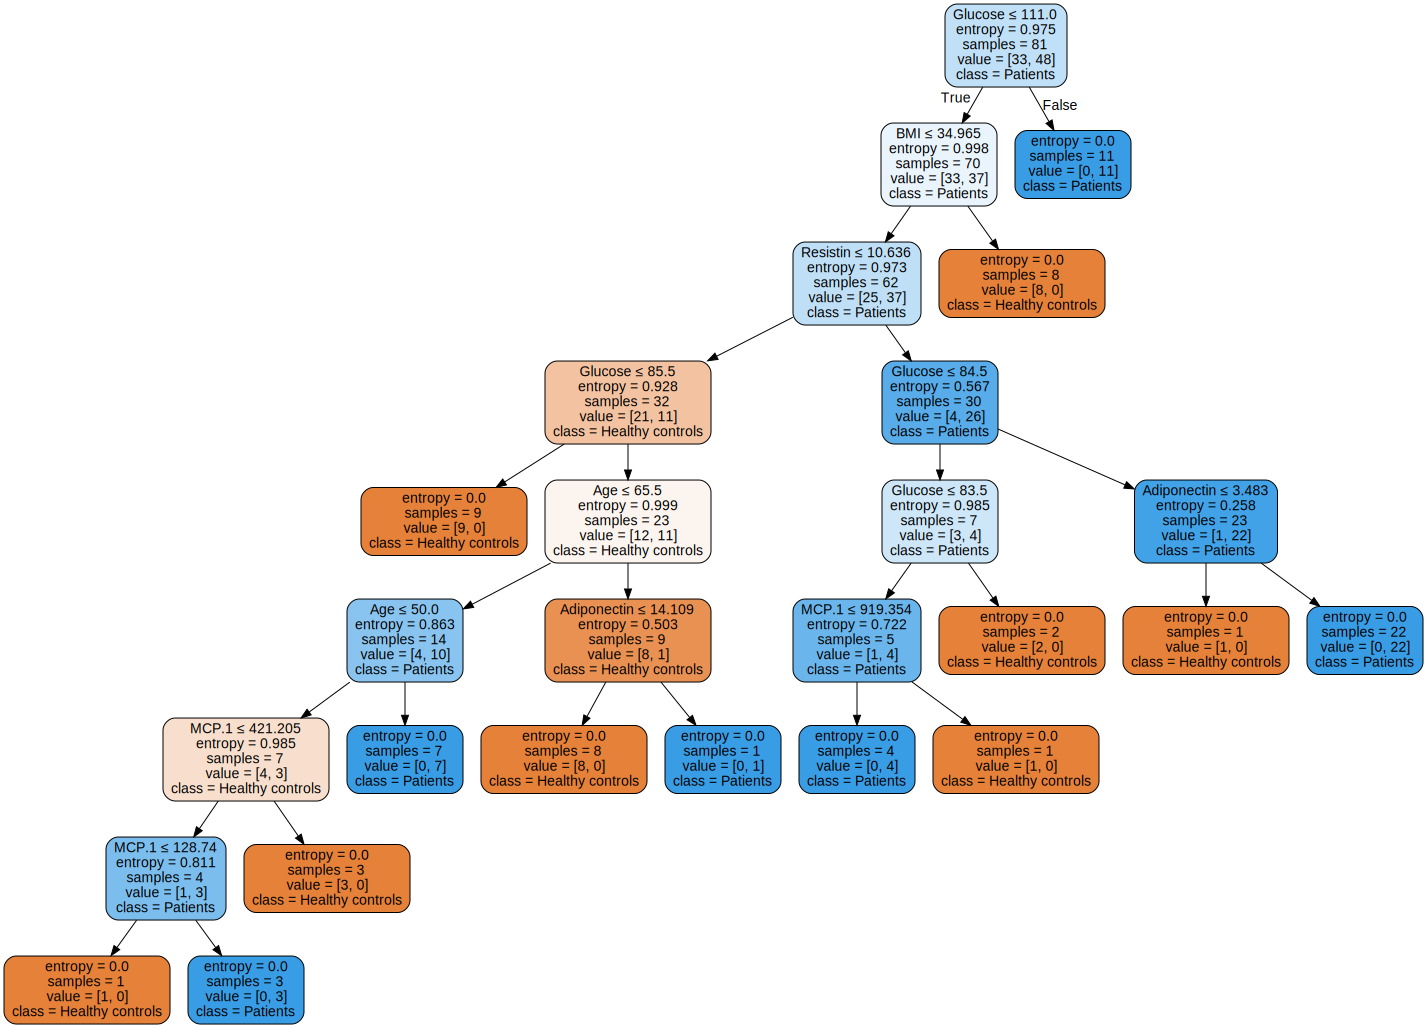

In [32]:
dot_data2 = tree.export_graphviz(clf2, out_file=None,feature_names=['Age','BMI','Glucose','Insulin','HOMA','Leptin','Adiponectin','Resistin','MCP.1'], class_names=['Healthy controls','Patients'],  
                         filled=True, rounded=True, special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

### Max Depth

In [33]:
clf3 =  tree.DecisionTreeClassifier(max_depth=2)
clf3 = clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)  
print(confusion_matrix(y_test, y_pred3))  
print(classification_report(y_test, y_pred3))

[[ 7 12]
 [ 1 15]]
             precision    recall  f1-score   support

          1       0.88      0.37      0.52        19
          2       0.56      0.94      0.70        16

avg / total       0.73      0.63      0.60        35



### Número máximo de folhas

In [34]:
clf4 =  tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf4 = clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)  
print(confusion_matrix(y_test, y_pred4))  
print(classification_report(y_test, y_pred4))

[[13  6]
 [ 6 10]]
             precision    recall  f1-score   support

          1       0.68      0.68      0.68        19
          2       0.62      0.62      0.62        16

avg / total       0.66      0.66      0.66        35



### Validação cruzada

Mean score 1.000 (0.000)
0.7142857142857143


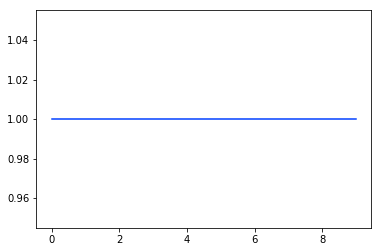

In [35]:
cv_score = cross_val_score(clf, datset_cm, datset_cm.Classification, cv=10)
print ("Mean score %.3f (%.3f)" % (cv_score.mean(), cv_score.std()))
print clf.score(X_test,y_test)
plt.plot(cv_score)

In [36]:
valores = datset_cm.Classification
print datset_cm.columns.get_values

<bound method Index.get_values of Index([u'Age', u'BMI', u'Glucose', u'Insulin', u'HOMA', u'Leptin',
       u'Adiponectin', u'Resistin', u'MCP.1', u'Classification'],
      dtype='object')>


Mean score 1.000 (0.000)
0.6571428571428571


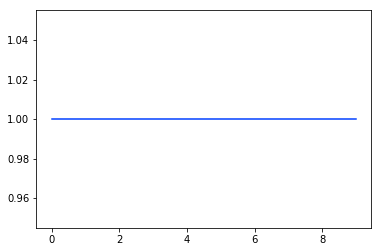

In [37]:
cv_score2 = cross_val_score(clf2,  datset_cm, datset_cm.Classification, cv=10)
print ("Mean score %.3f (%.3f)" % (cv_score2.mean(), cv_score2.std()))
print clf2.score(X_test,y_test)
plt.plot(cv_score2)